In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


# 🔹 Replace with your actual name
root = "/content/drive/MyDrive/ds_AtanuManna"

os.makedirs(f"{root}/csv_files", exist_ok=True)
os.makedirs(f"{root}/outputs", exist_ok=True)

# Optional placeholders
open(f"{root}/README.md", 'a').close()
open(f"{root}/ds_report.pdf", 'a').close()

print("✅ Permanent folder structure created successfully in Google Drive!")
!tree {root}


✅ Permanent folder structure created successfully in Google Drive!
/bin/bash: line 1: tree: command not found


In [6]:
# Load them into pandas
fear_greed = pd.read_csv('/content/drive/MyDrive/ds_AtanuManna/csv_files/fear_greed_index.csv')
trader_data = pd.read_csv('/content/drive/MyDrive/ds_AtanuManna/csv_files/historical_data.csv')

# View first few rows
print("📊 Fear & Greed Data:")
display(fear_greed.head())

print("📈 Trader Data:")
display(trader_data.head())

📊 Fear & Greed Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


📈 Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
trader_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [8]:
fear_greed.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [9]:


# --- Clean Fear & Greed Data ---
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
fear_greed = fear_greed[['date', 'value', 'classification']]

# --- Clean Trader Data ---
# Convert the Timestamp IST column into datetime
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract only the date part
trader_data['date'] = trader_data['Timestamp IST'].dt.date
trader_data['date'] = pd.to_datetime(trader_data['date'])

# Keep relevant numeric columns
numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee']
trader_data[numeric_cols] = trader_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# --- Quick sanity check ---
print("Fear & Greed:\n", fear_greed.head(), "\n")
print("Trader Data:\n", trader_data.head())


Fear & Greed:
         date  value classification
0 2018-02-01     30           Fear
1 2018-02-02     15   Extreme Fear
2 2018-02-03     40           Fear
3 2018-02-04     24   Extreme Fear
4 2018-02-05     11   Extreme Fear 

Trader Data:
                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       14

In [10]:
merged_df = pd.merge(trader_data, fear_greed, on='date', how='inner')

print(" Merged dataset shape:", merged_df.shape)
merged_df.head()


 Merged dataset shape: (211218, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,80,Extreme Greed


In [11]:
#Data Sanity Check
merged_df.info()
merged_df.describe(include='all')

# Check missing values
merged_df.isnull().sum()

# Quick sentiment counts
merged_df['classification'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [12]:
#Basic Descriptive Stats
print("Total Trades:", len(merged_df))
print("Unique Traders:", merged_df['Account'].nunique())
print("Unique Coins:", merged_df['Coin'].nunique())

# Basic trade metrics
print("\nClosed PnL Summary:")
print(merged_df['Closed PnL'].describe())

print("\nTrade Size Summary:")
print(merged_df['Size USD'].describe())


Total Trades: 211218
Unique Traders: 32
Unique Coins: 246

Closed PnL Summary:
count    211218.000000
mean         48.549304
std         917.989791
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.790132
max      135329.090100
Name: Closed PnL, dtype: float64

Trade Size Summary:
count    2.112180e+05
mean     5.639192e+03
std      3.657557e+04
min      0.000000e+00
25%      1.937900e+02
50%      5.970200e+02
75%      2.058878e+03
max      3.921431e+06
Name: Size USD, dtype: float64


Average Profit vs Sentiment

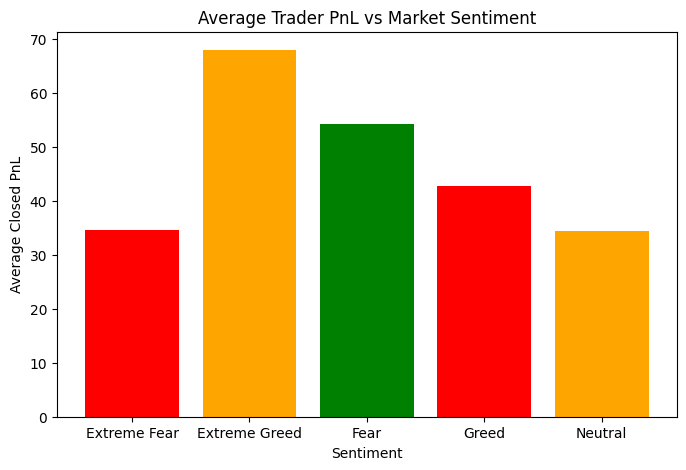

In [13]:

avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_pnl['classification'], avg_pnl['Closed PnL'], color=['red','orange','green'])
plt.title("Average Trader PnL vs Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
plt.savefig('/content/drive/MyDrive/ds_AtanuManna/outputs/avg_pnl_vs_sentiment.png')
plt.show()


Trading Volume vs Sentiment

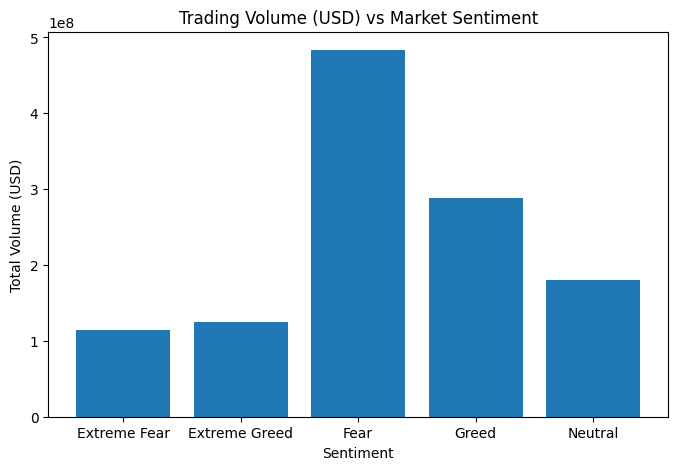

In [14]:
volumes = merged_df.groupby('classification')['Size USD'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(volumes['classification'], volumes['Size USD'])
plt.title("Trading Volume (USD) vs Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total Volume (USD)")
plt.savefig('/content/drive/MyDrive/ds_AtanuManna/outputs/volume_vs_sentiment.png')
plt.show()


Trade Direction Bias (Buy vs Sell)

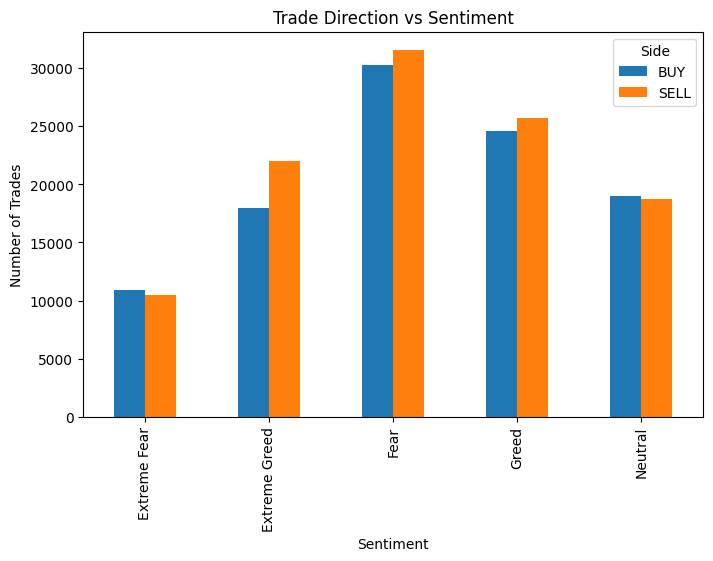

In [15]:
side_dist = merged_df.groupby(['classification','Side']).size().unstack().fillna(0)
side_dist.plot(kind='bar', figsize=(8,5))
plt.title("Trade Direction vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.savefig("/content/drive/MyDrive/ds_AtanuManna/outputs/trade_direction_vs_sentiment.png")


Profit Distribution

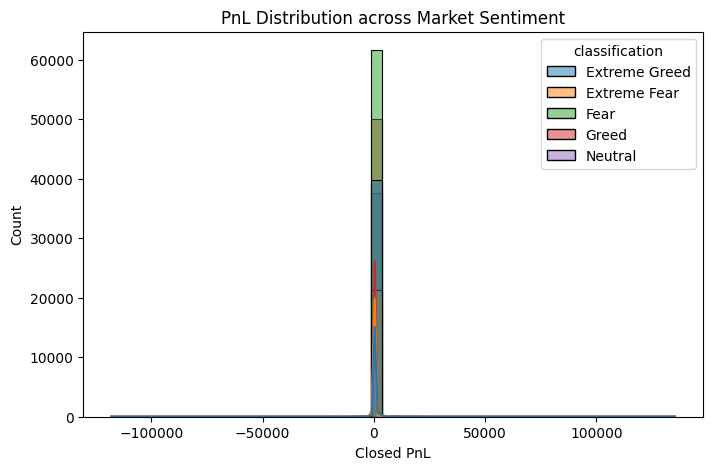

In [16]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=merged_df, x='Closed PnL', hue='classification', bins=50, kde=True)
plt.title("PnL Distribution across Market Sentiment")
plt.savefig(f"{root}/outputs/pnl_distribution_by_sentiment.png")
plt.show()


Time-based Trends

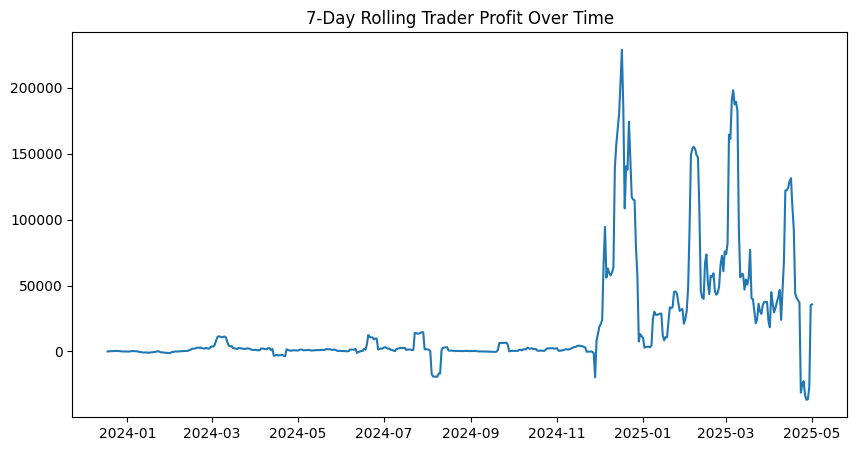

In [17]:
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().rolling(7).mean()
plt.figure(figsize=(10,5))
plt.plot(daily_pnl)
plt.title("7-Day Rolling Trader Profit Over Time")
plt.savefig(f"{root}/outputs/daily_pnl_trend.png")
plt.show()


Correlation Between Sentiment Value & Trader Metrics

In [18]:
correlation_df = merged_df.groupby('date').agg({
    'Closed PnL':'mean',
    'Size USD':'sum',
    'value':'first'
}).corr()

correlation_df


,Closed PnL,Size USD,value
Closed PnL,1.000000,0.013028,0.037315
Size USD,0.013028,1.000000,-0.264371
value,0.037315,-0.264371,1.000000


Account-level Behavior

In [19]:
account_perf = merged_df.groupby(['Account','classification'])['Closed PnL'].mean().unstack()
account_perf['difference'] = account_perf['Greed'] - account_perf['Fear']
account_perf.sort_values('difference', ascending=False).head(10)


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral,difference
Account,,,,,,
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,66.758350,0.000000,-187.201776,764.916220,0.000000,952.117995
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,-192.209701,181.294012,-379.998039,408.979729,-13.407838,788.977768
0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,8285.663252,23.692203,294.922917,440.010296,271.230714
0x8381e6d82f1affd39a336e143e081ef7620a3b7f,-98.479518,0.146471,4.698461,192.285897,9.063014,187.587436
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.780135,110.134280,66.092200,224.519734,NaN,158.427534
0x39cef799f8b69da1995852eea189df24eb5cae3c,-45.671160,125.272912,37.175405,168.123179,40.269294,130.947773
0x6d6a4b953f202f8df5bed40692e7fd865318264a,14.246564,428.023843,5.683451,125.325316,20.624933,119.641864
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,5.818598,178.981335,53.880498,163.069861,4009.581548,109.189363
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,3.906451,420.277529,7.420133,81.630024,-3.798615,74.209891
